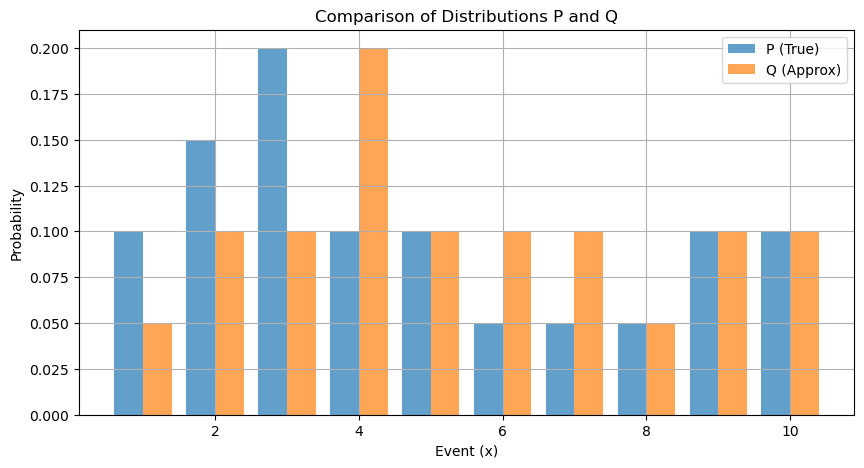

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import rel_entr
x = np.arange(1, 11)
P = np.array([0.10, 0.15, 0.20, 0.10, 0.10, 0.05, 0.05, 0.05, 0.10, 0.10])  # True distribution
Q = np.array([0.05, 0.10, 0.10, 0.20, 0.10, 0.10, 0.10, 0.05, 0.10, 0.10])  # Approximate distribution

# Normalize (just to be safe)
P = P / P.sum()
Q = Q / Q.sum()
plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, P, width=0.4, label='P (True)', alpha=0.7)
plt.bar(x + 0.2, Q, width=0.4, label='Q (Approx)', alpha=0.7)
plt.title("Comparison of Distributions P and Q")
plt.xlabel("Event (x)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Element-wise KL contribution
kl_elements = rel_entr(P, Q)
kl_div = np.sum(kl_elements)

print(f"KL Divergence D_KL(P || Q) = {kl_div:.4f}")


KL Divergence D_KL(P || Q) = 0.1301


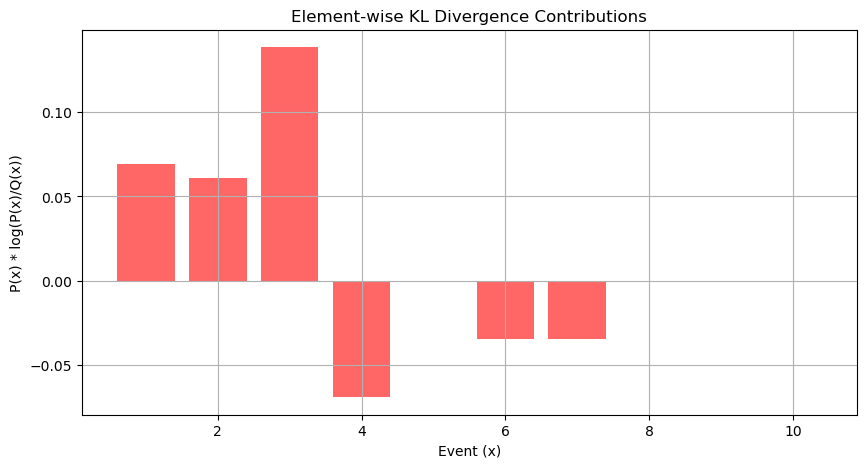

In [3]:
plt.figure(figsize=(10, 5))
plt.bar(x, kl_elements, color='red', alpha=0.6)
plt.title("Element-wise KL Divergence Contributions")
plt.xlabel("Event (x)")
plt.ylabel("P(x) * log(P(x)/Q(x))")
plt.grid(True)
plt.show()


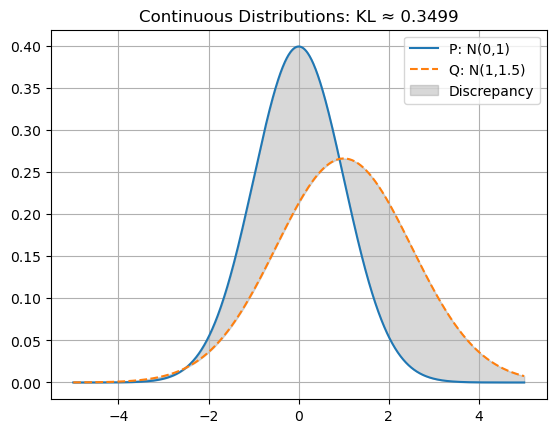

In [4]:
from scipy.stats import norm

x = np.linspace(-5, 5, 1000)
P_pdf = norm.pdf(x, loc=0, scale=1)    # Standard Normal
Q_pdf = norm.pdf(x, loc=1, scale=1.5)  # Shifted + Wider Normal

kl_div_cont = np.sum(P_pdf * np.log(P_pdf / Q_pdf)) * (x[1] - x[0])

plt.plot(x, P_pdf, label="P: N(0,1)")
plt.plot(x, Q_pdf, label="Q: N(1,1.5)", linestyle='--')
plt.title(f"Continuous Distributions: KL ≈ {kl_div_cont:.4f}")
plt.fill_between(x, P_pdf, Q_pdf, color='gray', alpha=0.3, label='Discrepancy')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    # Comparison based on frequency (for heap)
    def __lt__(self, other):
        return self.freq < other.freq

# Build Huffman Tree
def build_huffman_tree(char_freqs):
    heap = [Node(ch, freq) for ch, freq in char_freqs.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)

        merged = Node(None, node1.freq + node2.freq)
        merged.left = node1
        merged.right = node2

        heapq.heappush(heap, merged)

    return heap[0]

# Generate codes from tree
def generate_codes(node, prefix="", codebook={}):
    if node is None:
        return
    if node.char is not None:
        codebook[node.char] = prefix
    generate_codes(node.left, prefix + "0", codebook)
    generate_codes(node.right, prefix + "1", codebook)
    return codebook


In [7]:
def draw_huffman_tree(root):
    G = nx.Graph()
    pos = {}

    def add_edges(node, pos_x=0, pos_y=0, dx=1):
        if node is None:
            return
        label = node.char if node.char else str(node.freq)
        pos[label] = (pos_x, pos_y)

        if node.left:
            l_label = node.left.char if node.left.char else str(node.left.freq)
            G.add_edge(label, l_label)
            add_edges(node.left, pos_x - dx, pos_y - 1, dx / 2)

        if node.right:
            r_label = node.right.char if node.right.char else str(node.right.freq)
            G.add_edge(label, r_label)
            add_edges(node.right, pos_x + dx, pos_y - 1, dx / 2)

    add_edges(root)
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10)
    plt.title("Huffman Tree")
    plt.show()


Huffman Codes:
A: 1100
B: 1101
C: 100
D: 101
E: 111
F: 0


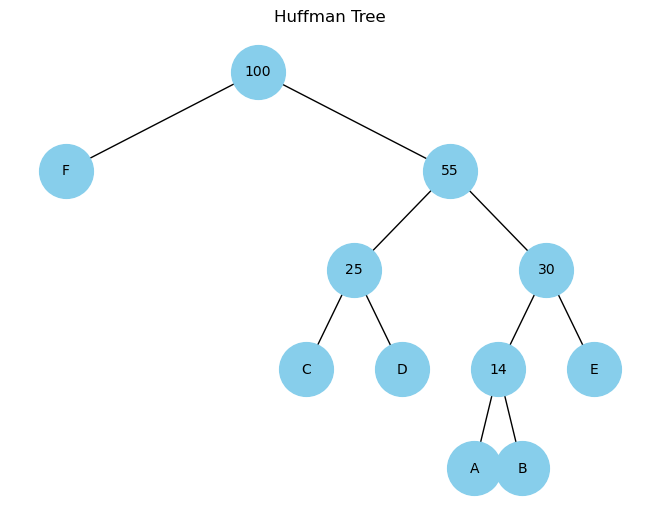

In [8]:
char_freqs = {'A': 5, 'B': 9, 'C': 12, 'D': 13, 'E': 16, 'F': 45}

root = build_huffman_tree(char_freqs)
codebook = generate_codes(root)

print("Huffman Codes:")
for ch in sorted(codebook):
    print(f"{ch}: {codebook[ch]}")

draw_huffman_tree(root)
